In [20]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

In [21]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
url=r'/Users/cherry/Desktop/all/'
amd_data=os.path.join(url,'amd.us.fmt.editedrows.csv')
dataframe = read_csv(amd_data, engine='python')
dataset = dataframe.values
dataset

array([['5/7/83', 15.94, 15.94, 15.47, 15.78, 489200],
       ['6/7/83', 15.72, 15.94, 15.66, 15.91, 348000],
       ['7/7/83', 15.91, 16.19, 15.78, 16.06, 287600],
       ...,
       ['5/9/18', 11.65, 11.98, 11.57, 11.95, 49500430],
       ['7/9/18', 16.73, 16.84, 16.17, 16.61, 58455450],
       ['8/9/18', 19.58, 19.71, 19.08, 19.1, 46385180]], dtype=object)

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset[:,[1]])

/Users/cherry/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
dataset

array([[0.31555751],
       [0.31070956],
       [0.31489643],
       ...,
       [0.22102248],
       [0.33296606],
       [0.39576906]])

In [32]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [33]:
look_back = 9
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [34]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [35]:
batch_size = 10
model2 = Sequential()
model2.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
for i in range(10):
    model2.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)


Epoch 1/10
 - 6s - loss: 0.0155
Epoch 2/10
 - 5s - loss: 0.0021
Epoch 3/10
 - 5s - loss: 9.6339e-04
Epoch 4/10
 - 5s - loss: 7.7851e-04
Epoch 5/10
 - 6s - loss: 7.2582e-04
Epoch 6/10
 - 5s - loss: 6.8612e-04
Epoch 7/10
 - 5s - loss: 6.4634e-04
Epoch 8/10
 - 5s - loss: 6.1434e-04
Epoch 9/10
 - 6s - loss: 5.9174e-04
Epoch 10/10
 - 7s - loss: 5.6580e-04
Epoch 1/10
 - 5s - loss: 5.2882e-04
Epoch 2/10
 - 7s - loss: 4.8677e-04
Epoch 3/10
 - 6s - loss: 4.4747e-04
Epoch 4/10
 - 7s - loss: 4.1360e-04
Epoch 5/10
 - 6s - loss: 3.8579e-04
Epoch 6/10
 - 5s - loss: 3.6364e-04
Epoch 7/10
 - 5s - loss: 3.4652e-04
Epoch 8/10
 - 5s - loss: 3.3297e-04
Epoch 9/10
 - 6s - loss: 3.2120e-04
Epoch 10/10
 - 6s - loss: 3.0997e-04
Epoch 1/10
 - 6s - loss: 2.9908e-04
Epoch 2/10
 - 5s - loss: 2.8892e-04
Epoch 3/10
 - 6s - loss: 2.7969e-04
Epoch 4/10
 - 5s - loss: 2.7128e-04
Epoch 5/10
 - 6s - loss: 2.6389e-04
Epoch 6/10
 - 5s - loss: 2.5747e-04
Epoch 7/10
 - 7s - loss: 2.5183e-04
Epoch 8/10
 - 5s - loss: 2.4698e-0

In [36]:
trainPredict = model2.predict(trainX, batch_size=batch_size)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
model2.reset_states()

testPredict = model2.predict(testX, batch_size=batch_size)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.02 RMSE
Test Score: 0.07 RMSE


In [37]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [38]:
testY=testY.reshape(-1,1)


In [39]:
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.36 RMSE


In [40]:
trainY=trainY.reshape(-1,1)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.74 RMSE


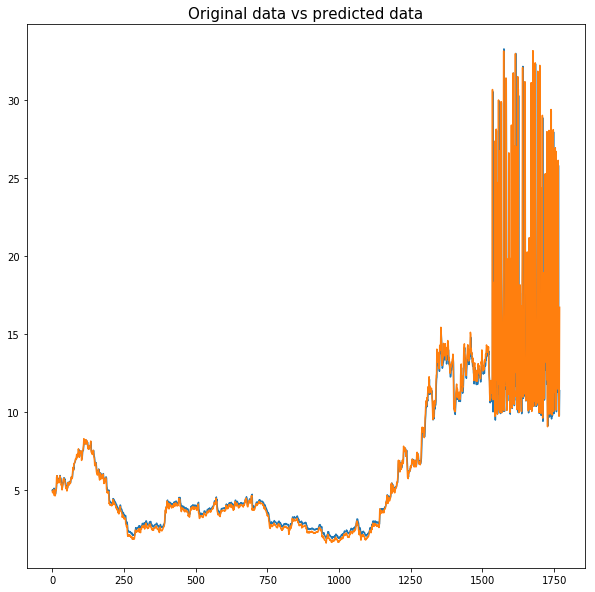

In [41]:
testY=testY.reshape(-1,1)
plt.figure(figsize=(10, 10))
plt.plot(testPredict)
plt.plot(testY)
plt.title('Original data vs predicted data', fontsize=15)
plt.show()

In [42]:
values_date=dataframe['Date'][len(train)+9:].values

In [43]:
predict_lowerdimen = testPredict.ravel()
actual_lowerdimen=testY.ravel()

In [44]:
train_final=[]
for i in range(len(values_date)-1):
    
    train_final.append([predict_lowerdimen[i],actual_lowerdimen[i],values_date[i]])
    
    i=i+1
    
    
    
    

In [45]:
numpy.savetxt('/Users/cherry/datasetamd1.csv',train_final,delimiter=',',fmt='%s')
